# 대선자료 시각화

In [99]:
# 모듈 불러오기
import pandas as pd

In [100]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
# Data 불러오기
election = pd.read_csv("../Data/election_2022.csv")
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072


In [102]:
# 기본 통계 확인하기 : 갯수, 평균, 표준편차, 1~4사분위수, 최댓값 등등
election.describe() #(include='all')

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


In [103]:
# 컬럼명 확인하기
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [104]:
# dimension확인하기
election.shape

(248, 7)

In [105]:
# 컬럼별 자료형 확인하기
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [106]:
# 전체컬럼에 대해 NaN확인
# election.isnull().sum()
election.isnull().any()

광역시도    False
시군구     False
선거인수    False
투표수     False
이재명     False
윤석열     False
심상정     False
dtype: bool

In [107]:
# 각후보의 투표수 합 구하기 (loc, iloc)

# 기본 합
# election['electionSum'] = election.이재명 + election.윤석열 + election.심상정

# loc 합 구하기
# election['electionSum'] = election.loc[:,'이재명':'심상정'].sum(axis=1)

# iloc 합 구하기
election['electionSum'] = election.iloc[:,4:].sum(axis=1)
election.head()


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727


In [108]:
# 투표율 구하기
election['electionRatio'] = round(election['electionSum'] / election['투표수'] * 100,2)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [109]:
# csv로 저장하기
election.to_csv("../Data/election_2022_1st.csv", index=False)

---
## 광역시별 투표율을 Pie Chart로 표현하기

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [111]:
election_area  = election.groupby('광역시도').sum()
election_area = election_area.loc[:,'투표수']
election_area.columns=['투표수']
election_area = pd.DataFrame(election_area) #33764664
election_area['ratio'] = round(election_area['투표수'] / 33764664 * 100 ,2)
election_area

,투표수,ratio
광역시도,,
강원도,1015458,3.01
경기도,8518854,25.23
경상남도,2146882,6.36
경상북도,1774284,5.25
광주광역시,985492,2.92
대구광역시,1611512,4.77
대전광역시,945308,2.80
부산광역시,2200224,6.52
서울특별시,6501831,19.26


In [112]:
election_area = election_area.sort_values('ratio',ascending=False)
election_area.head()

,투표수,ratio
광역시도,,
경기도,8518854,25.23
서울특별시,6501831,19.26
부산광역시,2200224,6.52
경상남도,2146882,6.36
인천광역시,1883504,5.58


In [113]:
plt.style.use("default")

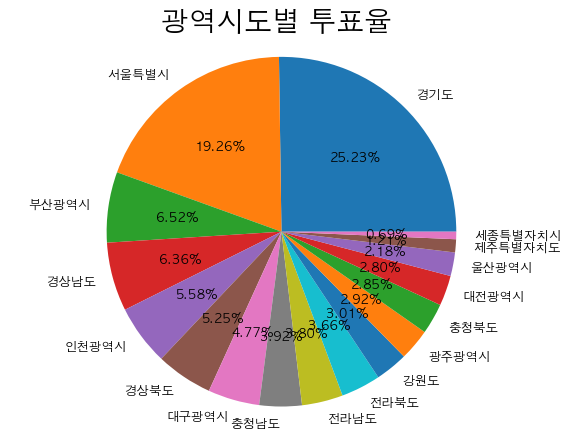

In [117]:
# 파이차트 그리기
election_area['ratio'].plot(
    kind = 'pie',
    figsize = (7, 5),
    autopct = '%.2f%%',
    textprops={'size': 9}
)
plt.title("광역시도별 투표율 ", size = 20)
plt.axis('equal') # 찌그러진 파이차트가 나올떄가있는데 이떄 사용
plt.ylabel('') # count Column Name 정해주는법
plt.show()

---

In [119]:
# plvot을 이용하여 광역시별 투표수 합계로 그룹화하여 집계한다.
elec_sum = election.pivot_table("투표수", index='광역시도', aggfunc=sum)
elec_sum.head()

,투표수
광역시도,
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492


In [121]:
#투표수별 순차를 내림차순으로 정렬
elec_sum_order = elec_sum.sort_values(by='투표수', ascending=False)
elec_sum_order.head()

,투표수
광역시도,
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504


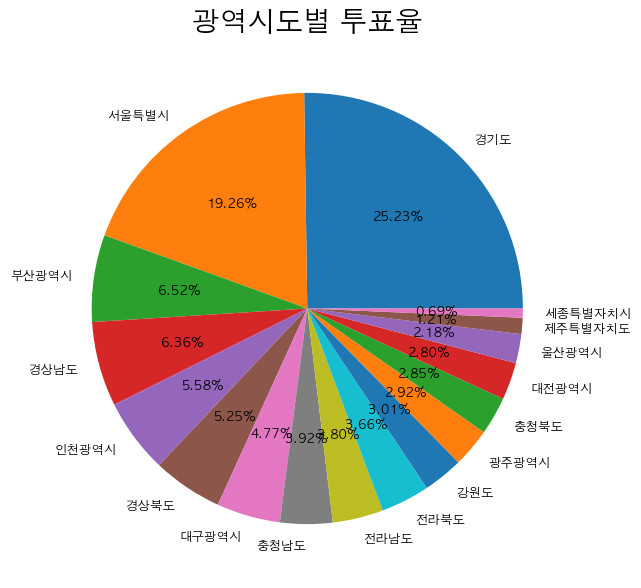

In [118]:
data = elec_sum_order['투표수']
categories = list(elec_sum_order.index)

#사이즈 지정
plt.rcParams['figure.figsize'] = (7 , 7)
# 폰트 사이즈 지정
plt.rcParams['font.size'] =9

plt.pie(
    data,
    labels=categories,
    autopct="%.2f%%"
)

plt.title("광역시도별 투표율", fontsize = 20)
plt.show()

## 윤석열 후보의 광역시도별 득표율 구하기

In [123]:
# plvot을 이용하여 광역시별 투표수 합계로 그룹화하여 집계한다.
elec_Ysum = election.pivot_table("윤석열", index='광역시도', aggfunc=sum)
elec_Ysum.head()

,윤석열
광역시도,
강원도,544980
경기도,3859666
경상남도,1237346
경상북도,1278922
광주광역시,124511


In [125]:
#투표수별 순차를 내림차순으로 정렬
elec_Ysum_order = elec_Ysum.sort_values(by='윤석열', ascending=False)
elec_Ysum_order.head()

,윤석열
광역시도,
경기도,3859666
서울특별시,3255747
경상북도,1278922
부산광역시,1270072
경상남도,1237346


In [ ]:
dataY = elec_Ysum_order['윤석열']
categories = list(elec_Ysum_order.index)

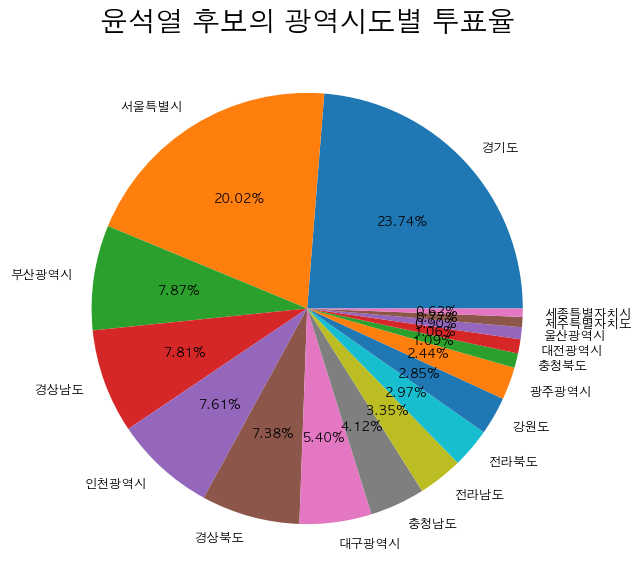

In [126]:
#사이즈 지정
plt.rcParams['figure.figsize'] = (7 , 7)
# 폰트 사이즈 지정
plt.rcParams['font.size'] = 9

plt.pie(
    dataY,
    labels=categories,
    autopct="%.2f%%"
)

plt.title("윤석열 후보의 광역시도별 투표율", fontsize = 20)
plt.show()

## 윤석열 후보의 서울득표 Top5

In [130]:
election_s = election[election['광역시도'] == '서울특별시']
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [128]:
# plvot을 이용하여 광역시별 투표수 합계로 그룹화하여 집계한다.
elec_YSsum = election_s.pivot_table("윤석열", index='시군구', aggfunc=sum)
elec_YSsum.head()

,윤석열
시군구,
강남구,235897
강동구,160593
강북구,86540
강서구,181510
관악구,151944


In [129]:
#투표수별 순차를 내림차순으로 정렬
elec_YSsum_order = elec_YSsum.sort_values(by='윤석열', ascending=False)
elec_YSsum_order.head()

,윤석열
시군구,
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340


In [131]:
# 행추가하기!
Y = elec_YSsum_order[:5]
Y.loc['기타'] = elec_YSsum_order.iloc[5:,:].sum()
Y

,윤석열
시군구,
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
기타,2240362


In [132]:
dataYS = Y['윤석열']
categories_YS = list(Y.index)
dataYS

시군구
송파구     255166
강남구     235897
강서구     181510
서초구     179472
노원구     163340
기타     2240362
Name: 윤석열, dtype: int64

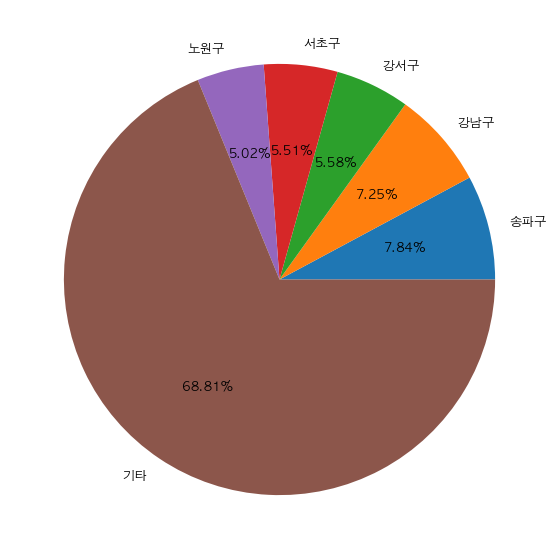

In [133]:
#사이즈 지정
plt.rcParams['figure.figsize'] = (7 , 7)
# 폰트 사이즈 지정
plt.rcParams['font.size'] = 9

plt.pie(
    dataYS,
    labels=categories_YS,
    autopct="%.2f%%"
)

# plt.title("윤석열 후보의 광역시도별 투표율", fontsize = 20)
plt.show()

---
## 대선주자 출생지별 득표율 분석
- 윤석열 후보의 출생시 서울시 성북구

In [134]:
election_sung = election_s[election_s['시군구'] == '성북구']
election_sung['기타'] = (election_sung['투표수']-election_sung.iloc[:,4:7].sum(axis=1))
election_sung = election_sung.iloc[:,[5,4,6,9]].T
election_sung.columns = ['성북구 득표수']
election_sung

,성북구 득표수
윤석열,135044
이재명,142702
심상정,8952
기타,5489


In [135]:
data_sung = election_sung['성북구 득표수']
categories_sung = list(election_sung.index)

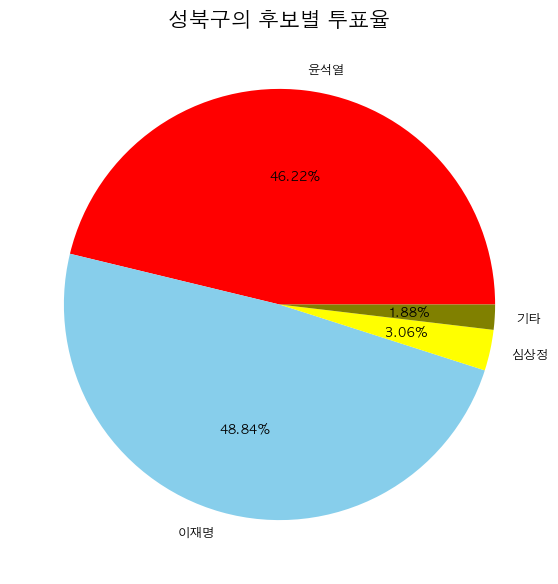

In [136]:
#사이즈 지정
plt.rcParams['figure.figsize'] = (7 , 7)
# 폰트 사이즈 지정
plt.rcParams['font.size'] = 9

plt.pie(
    data_sung,
    labels=categories_sung,
    autopct="%.2f%%",
    colors = ['red','skyblue','yellow','olive']
)

plt.title("성북구의 후보별 투표율", fontsize = 15)
plt.show()

---
#### pd.Series 사용해서 데이터 추출후 만들기

In [137]:
pob_윤석열 = election[election['시군구'] == '성북구']
pob_윤석열

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
7,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12


In [138]:
pob_윤석열_data = \
    pd.Series([int(pob_윤석열['윤석열']), int(pob_윤석열['이재명']), int(pob_윤석열['심상정'])]).\
        append(pob_윤석열['투표수'] - pob_윤석열['electionSum']).reset_index(drop=True)
        #reset_index(drop=True) index를 새로 만든다라는 뜻
pob_윤석열_data

0    135044
1    142702
2      8952
3      5489
dtype: int64

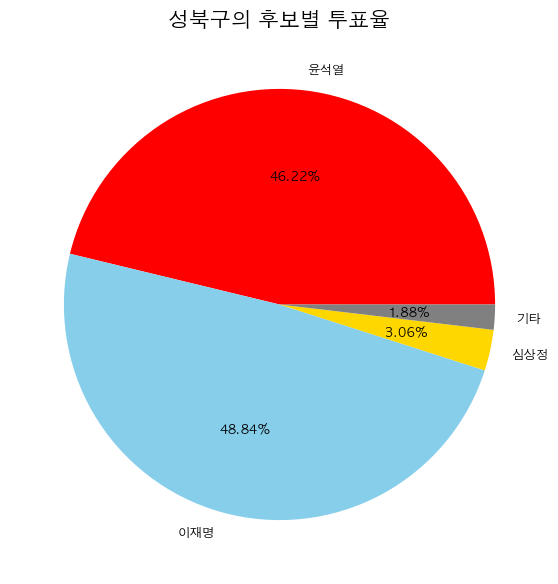

In [139]:
plt.pie(
    pob_윤석열_data,
    labels = ['윤석열','이재명','심상정','기타'],
    autopct='%.2f%%',
    colors=['red','#87CEEB','gold','gray']
)
plt.title("성북구의 후보별 투표율", fontsize = 15)
plt.show()

---
### 투표수가 가장 많은 4지역 (광역시도)의 각 후보별 득표수를 막대그래프로 표현하기

In [140]:
# 광역시도별 득표수 top4 골라오기
election_area  = election.groupby('광역시도').sum()
election_area = election_area.sort_values('투표수', ascending=False)
election_area = election_area.iloc[:4:,[3,2,4]]
election_area = election_area/1000
election_area

,윤석열,이재명,심상정
광역시도,,,
경기도,3859.666,4297.931,201.113
서울특별시,3255.747,2944.981,180.324
부산광역시,1270.072,831.896,47.541
경상남도,1237.346,794.130,52.591


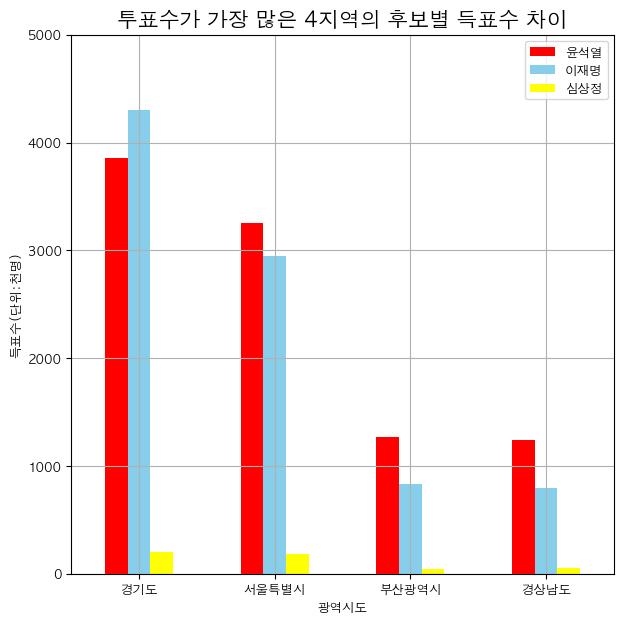

In [141]:
election_area.plot(
    kind = 'bar',
    color = ['red','skyblue','yellow'],
)

plt.grid() # 뒤에 그리드 보여주기!
plt.xticks(rotation=0)
plt.title("투표수가 가장 많은 4지역의 후보별 득표수 차이", size = 15)
plt.ylabel('득표수(단위:천명)')
plt.xlabel('광역시도')
plt.ylim(0,5000)
plt.show()

# 지수를 정수로 바꿀떄 쓰는 코드
# plt.ticklabel_format(axis='y',useOffset=False, style='plain')

---
### 투표수가 가장 많은 5지역 (시군구)의 각 후보별 득표수를 막대그래프로 표현하기

In [142]:
# 광역시도, 시군구 별 득표수 top5 골라오기
election_si  = election
election_si = election_si.sort_values('투표수', ascending=False)
election_si['지역'] = election_si['광역시도'] + " " +election_si['시군구']
election_si = election_si.iloc[:5,[5,4,6,9]]
election_si.index = election_si['지역']
election_si = election_si.iloc[:,:3]
election_si

,윤석열,이재명,심상정
지역,,,
경기도 화성시,236055,283324,12955
경기도 부천시,224331,285227,13249
경기도 남양주시,203075,239179,10089
서울특별시 송파구,255166,180490,10652
서울특별시 강서구,181510,190000,11100


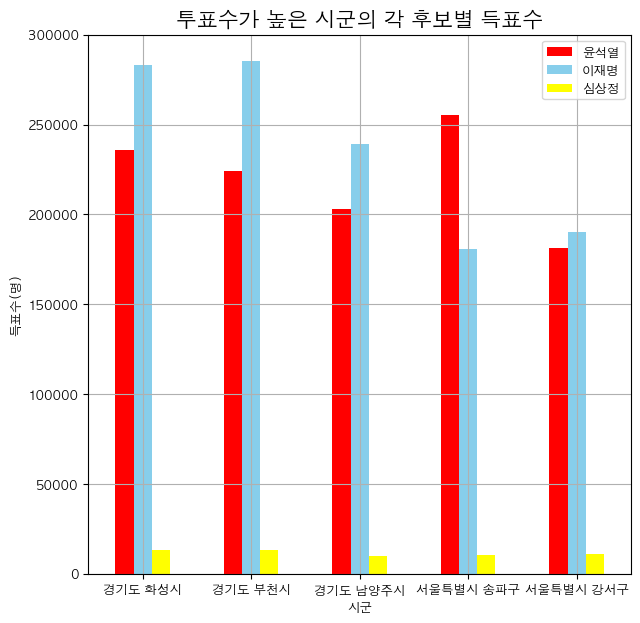

In [144]:
election_si.plot(
    kind = 'bar',
    color = ['red','skyblue','yellow'],
)

plt.grid() # 뒤에 그리드 보여주기!
plt.xticks(rotation=0)
plt.title("투표수가 높은 시군의 각 후보별 득표수", size = 15)
plt.ylabel('득표수(명)')
plt.xlabel('시군')
plt.ylim(0,300000)
plt.show()

# 지수를 정수로 바꿀떄 쓰는 코드
# plt.ticklabel_format(axis='y',useOffset=False, style='plain')

---

- 왠만하면 코딩을 1줄씩 하는게 좋아

In [145]:
elec_top5 = \
    election.sort_values(by='투표수', ascending=False)[0:5][['윤석열','이재명','심상정']].reset_index(drop=True)
elec_top5

,윤석열,이재명,심상정
0,236055,283324,12955
1,224331,285227,13249
2,203075,239179,10089
3,255166,180490,10652
4,181510,190000,11100


In [146]:
city = \
election.sort_values(by='투표수', ascending=False)[0:5]['광역시도'] + " " \
    + election.sort_values(by='투표수', ascending=False)[0:5]['시군구']
city

100      경기도 화성시
85       경기도 부천시
98      경기도 남양주시
23     서울특별시 송파구
15     서울특별시 강서구
dtype: object

In [147]:
elec_top5.index = city.reset_index(drop=True)
elec_top5

,윤석열,이재명,심상정
경기도 화성시,236055,283324,12955
경기도 부천시,224331,285227,13249
경기도 남양주시,203075,239179,10089
서울특별시 송파구,255166,180490,10652
서울특별시 강서구,181510,190000,11100


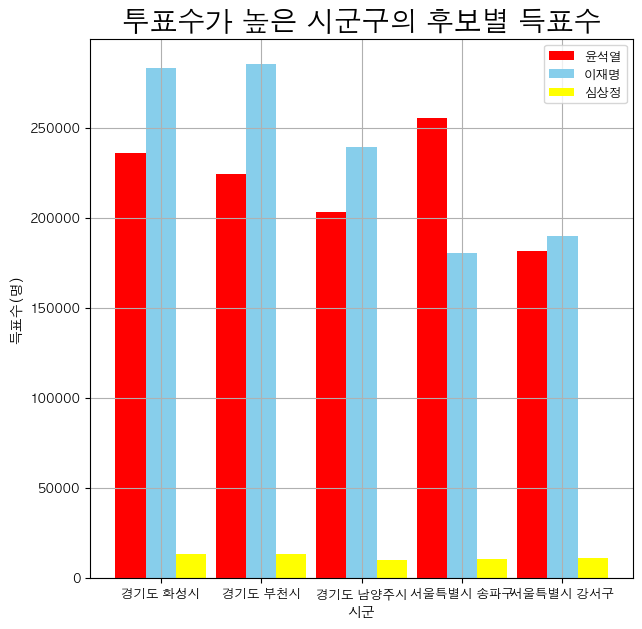

<Figure size 700x700 with 0 Axes>

In [148]:
elec_top5.plot.bar(
    rot = 0,
    color=['red','skyblue','yellow'],
    width = 0.9 # 막대그래프 폭
)
plt.rcParams['font.size'] = 8
plt.title('투표수가 높은 시군구의 후보별 득표수', size = 20)
plt.ylabel('득표수(명)', size = 10)
plt.xlabel('시군', size = 10)
plt.grid()
plt.show()
plt.savefig('../Data/투표수가 높은 시군구의 후보별 득표수.png')